## EDA & Predict sales of summer clothes in E-commerce Wish

### Background
Studying top products requires more than just product listings. You also need to know what sells well and what does not.

This dataset contains product listings as well as products ratings and sales performance.

With this, you can finally start to look for correlations and patterns regarding the success of a product and the various components.

### Task
__Develop a model for product success - Help businesses answer the crucial question "How well is a product likely to sell ?"__

i.e. Build a model that can help predict how well a product is going to sell. => This is a regression problem to predict number of units sold.

Such a model has many implications and could be used in many different ways, the most straightforward being to adjust how much of a product should be kept in stock.


### Inspiration (What factors will affect product success?)

1. How about trying to validate the established idea of human sensitiveness to price drops ? (impact of discount on units sold)

2. What are the top categories of products which sell best?

3. Do bad products sell ? How is the relationship between the quality of a product (ratings) and its success ? Does the price factor into this ?

4. Do seller's fame factor into top products ? (merchant name)

5. Does using ad boost help to sell more?

6. Do the number of tags (making a product more discoverable) factor into the success of a product ?


Data Source: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Initial Hypothesis
The following factors might bring positive impact on number of unit sold:

- low price
- high discount
- high rating
- high rating_five_count, rating_four_count,rating_three_count
- high badge count
- high merchant rating
- use_ad_boost

### Steps

1. Understanding the data
2. EDA 
   - Univariate Analysis - to look into the distribution of the independent variables
   - Bivariate Analysis - to answer the inspiration questions + look into the relationship between the independent variables & the target variable
    
    
3. Handling of Duplicated rows, Missing values, Outliers
4. Model building and Evalution

### 1. Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import os

In [3]:
#data_dir = 'online_ex/summer_products_sales'
#os.listdir(data_dir)

In [4]:
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [5]:
df_original = df.copy()

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
df.head(2)

title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   16.0            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress    8.0            22   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45          6135   

   rating_five_count  rating_four_count  rating_three_count  rating_two_count  \
0               26.0                8.0                10.0               1.0   
1             2269.0             1027.0              1118.0             644.0   

   rating_one_count  badges_count  badge_local_product  badge_product_quality  \
0               9.0             0                    0                      0   
1            1077.0             0                    0                      0   

   badge_fast_shipping                                               tags  \
0                    0  Summer,Fashion,womenunderwearsuit,printedpajam...   
1                    0  Mini,womens dresses,Summer,Patchwork,fashion d...   

  product_color product_variation_size_id  product_variation_inventory  \
0         white                         M                           50   
1         green                        XS                           50   

  shipping_option_name  shipping_option_price  shipping_is_express  \
0   Livraison standard                      4                    0   
1   Livraison standard                      2                    0   

   countries_shipped_to  inventory_total  has_urgency_banner  \
0                    34               50                 1.0   
1                    41               50                 1.0   

         urgency_text origin_country merchant_title merchant_name  \
0  Quantité limitée !             CN       zgrdejia      zgrdejia   
1  Quantité limitée !             CN      SaraHouse     sarahouse   

              merchant_info_subtitle  merchant_rating_count  merchant_rating  \
0                        (568 notes)                    568         4.128521   
1  83 % avis positifs (17,752 notes)                  17752         3.899673   

                merchant_id  merchant_has_profile_picture  \
0  595097d6a26f6e070cb878d1                             0   
1  56458aa03a698c35c9050988                             0   

  merchant_profile_picture                                      product_url  \
0                      NaN  https://www.wish.com/c/5e9ae51d43d6a96e303acdb0   
1                      NaN  https://www.wish.com/c/58940d436a0d3d5da4e95a38   

                                     product_picture  \
0  https://contestimg.wish.com/api/webimage/5e9ae...   
1  https://contestimg.wish.com/api/webimage/58940...   

                 product_id   theme crawl_month  
0  5e9ae51d43d6a96e303acdb0  summer     2020-08  
1  58940d436a0d3d5da4e95a38  summer     2020-08

In [8]:
cat1 = pd.read_csv('unique-categories.csv')
cat1.head(5)

tag
0  #fashion #shorts
1  #fashion #tshirt
2        #Sport Bra
3   #Summer Clothes
4        #top #crop

In [9]:
cat2 = pd.read_csv('unique-categories.sorted-by-count.csv')
cat2_orignal = cat2.copy()
cat2.head(5)

count          keyword
0   1321           Summer
1   1315  Women's Fashion
2   1082          Fashion
3    961            Women
4    905           Casual

In [10]:
cat2 = cat2.iloc[:,::-1]
cat2.head(5)

keyword  count
0           Summer   1321
1  Women's Fashion   1315
2          Fashion   1082
3            Women    961
4           Casual    905

In [11]:
print('df.shape: ',df.shape,'\n')
df.info()

df.shape:  (1573, 43) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non

In [12]:
df.describe()

price  retail_price     units_sold  uses_ad_boosts       rating  \
count  1573.000000   1573.000000    1573.000000     1573.000000  1573.000000   
mean      8.325372     23.288620    4339.005086        0.432931     3.820896   
std       3.932030     30.357863    9356.539302        0.495639     0.515374   
min       1.000000      1.000000       1.000000        0.000000     1.000000   
25%       5.810000      7.000000     100.000000        0.000000     3.550000   
50%       8.000000     10.000000    1000.000000        0.000000     3.850000   
75%      11.000000     26.000000    5000.000000        1.000000     4.110000   
max      49.000000    252.000000  100000.000000        1.000000     5.000000   

       rating_count  rating_five_count  rating_four_count  rating_three_count  \
count   1573.000000        1528.000000        1528.000000         1528.000000   
mean     889.659250         442.263743         179.599476          134.549738   
std     1983.928834         980.203270         400.516231          311.690656   
min        0.000000           0.000000           0.000000            0.000000   
25%       24.000000          12.000000           5.000000            4.000000   
50%      150.000000          79.000000          31.500000           24.000000   
75%      855.000000         413.500000         168.250000          129.250000   
max    20744.000000       11548.000000        4152.000000         3658.000000   

       rating_two_count  rating_one_count  badges_count  badge_local_product  \
count       1528.000000       1528.000000   1573.000000          1573.000000   
mean          63.711387         95.735602      0.105531             0.018436   
std          151.343933        214.075544      0.340709             0.134565   
min            0.000000          0.000000      0.000000             0.000000   
25%            2.000000          4.000000      0.000000             0.000000   
50%           11.000000         20.000000      0.000000             0.000000   
75%           62.000000         94.000000      0.000000             0.000000   
max         2003.000000       2789.000000      3.000000             1.000000   

       badge_product_quality  badge_fast_shipping  \
count            1573.000000          1573.000000   
mean                0.074380             0.012715   
std                 0.262472             0.112075   
min                 0.000000             0.000000   
25%                 0.000000             0.000000   
50%                 0.000000             0.000000   
75%                 0.000000             0.000000   
max                 1.000000             1.000000   

       product_variation_inventory  shipping_option_price  \
count                  1573.000000            1573.000000   
mean                     33.081373               2.345200   
std                      21.353137               1.024371   
min                       1.000000               1.000000   
25%                       6.000000               2.000000   
50%                      50.000000               2.000000   
75%                      50.000000               3.000000   
max                      50.000000              12.000000   

       shipping_is_express  countries_shipped_to  inventory_total  \
count          1573.000000           1573.000000      1573.000000   
mean              0.002543             40.456453        49.821360   
std               0.050379             20.301203         2.562799   
min               0.000000              6.000000         1.000000   
25%               0.000000             31.000000        50.000000   
50%               0.000000             40.000000        50.000000   
75%               0.000000             43.000000        50.000000   
max               1.000000            140.000000        50.000000   

       has_urgency_banner  merchant_rating_count  merchant_rating  \
count               473.0           1.573000e+03      1573.000000   
mean                  1.0           2.649583e+04     

In [13]:
# compute % of the null values per column
na = df.isnull().sum()
round(na[na>0]/df.shape[0],3)

rating_five_count            0.029
rating_four_count            0.029
rating_three_count           0.029
rating_two_count             0.029
rating_one_count             0.029
product_color                0.026
product_variation_size_id    0.009
has_urgency_banner           0.699
urgency_text                 0.699
origin_country               0.011
merchant_name                0.003
merchant_info_subtitle       0.001
merchant_profile_picture     0.856
dtype: float64

__Null values__
- Missing values found in rating variables, product color, product size, origin country, merchant name
- 70% null values found in 'has_urgency_banner', 'urgency_text' => Have to decide whether excluding the variable in modelling will be a better choice??
- 'merchant_info_subtitle' and 'merchant_profile_picture' are rather irrelevant variables - decide to remove.

### 2. EDA

Let's have a look into the independent variables:

- __categorical:__  'uses_ad_boosts','shipping_is_express','has_urgency_banner','merchant_has_profile_picture','badge_local_product', 'badge_product_quality', 'badge_fast_shipping'


- __ordinal:__'product_color','product_variation_size_id','shipping_option_name',
'shipping_option_price','origin_country','badges_count','shipping_option_price'


- __numerical:__ 'price', 'retail_price','rating', 'rating_count','rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count','rating_one_count','product_variation_inventory','countries_shipped_to',
'merchant_rating','merchant_rating_count','inventory_total'


Target variable: units_sold

### 2.1 Univariate Analysis

__Categorical__

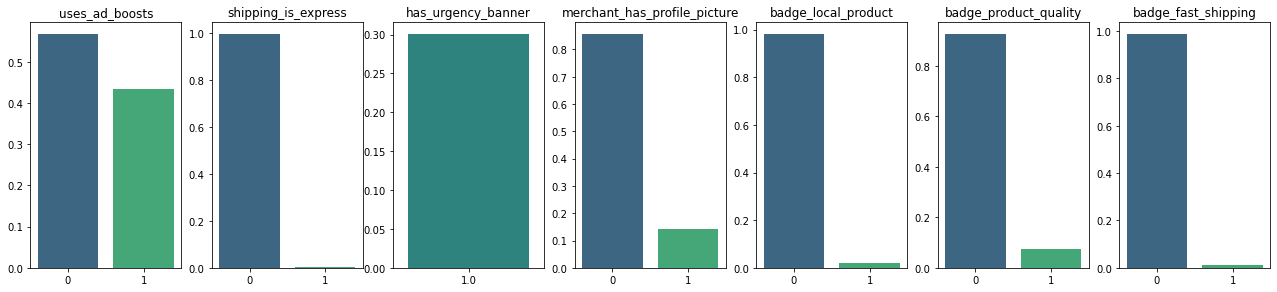

In [14]:
# Explore the binary catrgorical values


lst = ['uses_ad_boosts','shipping_is_express','has_urgency_banner','merchant_has_profile_picture',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

fig, ax = plt.subplots(1,7,figsize=(18,4))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

#x_coor = 0
#y_coor = 0

for i in range(0,len(lst)):
#    if (y_coor %4 ==0) & (y_coor > 0):
#        y_coor = 0
#        x_coor += 1
        
    a = df[lst[i]].value_counts(normalize=True,dropna=False)
    #print(lst[i],'\n',a)
    sns.barplot(a.index,a.values,ax=ax[i],palette="viridis")
    ax[i].set_title(lst[i])
    
#    y_coor += 1



- around 60% do use ad boosts
- almost all items do express shipping
- 30% items do have urgency banner 
- around 85% of merchants have profile picture
- Over 80% do not have any badges for local product/quality/fast shipping

__Ordinal__

Modify the size and color columns before doing visualization.

In [15]:
# modify the size column coz too many unique values

print('from :\n',df['product_variation_size_id'].unique())

def size_filter(size):
    
    lst = ['-','size',' ','.','pants','waist5862cm','pink','/','&','black','(bust88cm)','1pc','(',')','32','diameter30cm']
    
    for i in range(0,len(lst)):
        size = str(size).lower().replace(lst[i],'')
    
    size = str(size).replace('25s','s')
    size = str(size).replace('2xl','xxl')
    size = str(size).replace('4xl','xxxxl')
    size = str(size).replace('5xl','xxxxxl')
    
    size_list = ['xxs','xs','s','m','l','xl','xxl','xxxl','xxxxl','xxxxxl']
    
    return size.upper() if size in size_list else 'others'

df['size'] = df['product_variation_size_id'].apply(size_filter)

print('\ncorrected to: ',df['size'].unique())

from :
 ['M' 'XS' 'S' 'Size-XS' 'M.' 'XXS' 'L' 'XXL' nan 'S.' 's' 'choose a size'
 'XS.' '32/L' 'Suit-S' 'XXXXXL' 'EU 35' '4' 'Size S.' '1m by 3m' '3XL'
 'Size S' 'XL' 'Women Size 36' 'US 6.5 (EU 37)' 'XXXS' 'SIZE XS'
 '26(Waist 72cm 28inch)' 'Size XXS' '29' '1pc' '100 cm' 'One Size'
 'SIZE-4XL' '1' 'S/M(child)' '2pcs' 'XXXL' 'S..' '30 cm' '5XL' '33'
 'Size M' '100 x 100cm(39.3 x 39.3inch)' '100pcs' '2XL' '4XL' 'SizeL'
 'SIZE XXS' 'XXXXL' 'Base & Top & Matte Top Coat' 'size S' '35' '34'
 'SIZE-XXS' 'S(bust 88cm)' 'S (waist58-62cm)' 'S(Pink & Black)' '20pcs'
 'US-S' 'Size -XXS' 'X   L' 'White' '25' 'Size-S' 'Round' 'Pack of 1'
 '1 pc.' 'S Diameter 30cm' '6XL' 'AU plug Low quality' '5PAIRS' '25-S'
 'Size/S' 'S Pink' 'Size-5XL' 'daughter 24M' '2' 'Baby Float Boat' '10 ml'
 '60' 'Size-L' 'US5.5-EU35' '10pcs' '17' 'Size-XXS' 'Women Size 37'
 '3 layered anklet' '4-5 Years' 'Size4XL' 'first  generation'
 '80 X 200 CM' 'EU39(US8)' 'L.' 'Base Coat' '36' '04-3XL' 'pants-S'
 'Floating Chair for K

In [16]:
# modufy the product color column coz too many unique values

print('from :\n',df['product_color'].unique())

def color_filter(color):
    
    color = str(color).lower()
    lst = ['light','fluorescent','cool',' ','sky','mint','dusty','dark','orange-','coral','denim','apple',
           'off','print','lake','prussian','watermelon','stripe']
    
    for i in range(0,len(lst)):
        color = color.replace(lst[i],'')
        
    color = color.replace('navyblue','blue')
    color = color.replace('navy','blue')
    color = color.replace('whitefloral','white')
    color = color.replace('floral','white')
    color = color.replace('camel','brown')
    color = color.replace('tan','brown')
    color = color.replace('gray','grey')
    color = color.replace('rose','red')
    color = color.replace('wine','red')
    color = color.replace('redred','red')
    color = color.replace('redgold','gold')
    color = color.replace('violet','purple')
    
    
    if '&' in color:
        color = 'multicolor' 
        
    color_list = ['white','black','green','armygreen','yellow','blue','khaki','beige','brown','grey',
                  'pink', 'red','orange','purple','leopard','multicolor']
    
    return color if color in color_list else 'others'

df['color'] = df['product_color'].apply(color_filter)

print('\ncorrected to: \n',df['color'].unique())

from :
 ['white' 'green' 'leopardprint' 'black' 'yellow' 'navyblue' 'blue' 'beige'
 'grey' 'lightblue' 'orange' 'red' 'Black' 'armygreen' nan 'pink' 'khaki'
 'red & blue' 'blue & pink' 'RED' 'white & green' 'winered'
 'black & green' 'purple' 'whitefloral' 'floral' 'fluorescentgreen'
 'orange & camouflage' 'lightyellow' 'coolblack' 'multicolor' 'camouflage'
 'lightpink' 'pink & black' 'silver' 'Army green' 'lightgreen' 'mintgreen'
 'pink & grey' 'gray' 'coffee' 'rose' 'light green' 'leopard'
 'black & white' 'orange-red' 'dustypink' 'White' 'star' 'white & black'
 'apricot' 'skyblue' 'burgundy' 'claret' 'pink & white' 'rosered' 'tan'
 'navy blue' 'wine red' 'lightred' 'Pink' 'coralred' 'brown' 'lakeblue'
 'darkblue' 'camel' 'pink & blue' 'nude' 'Blue' 'lightpurple' 'army'
 'black & stripe' 'Rose red' 'greysnakeskinprint' 'denimblue' 'applegreen'
 'offwhite' 'lightgray' 'navy' 'gray & white' 'brown & yellow'
 'winered & yellow' 'army green' 'whitestripe' 'rainbow' 'lightgrey'
 'watermel

Text(0.5, 1.0, 'shipping_option_price')

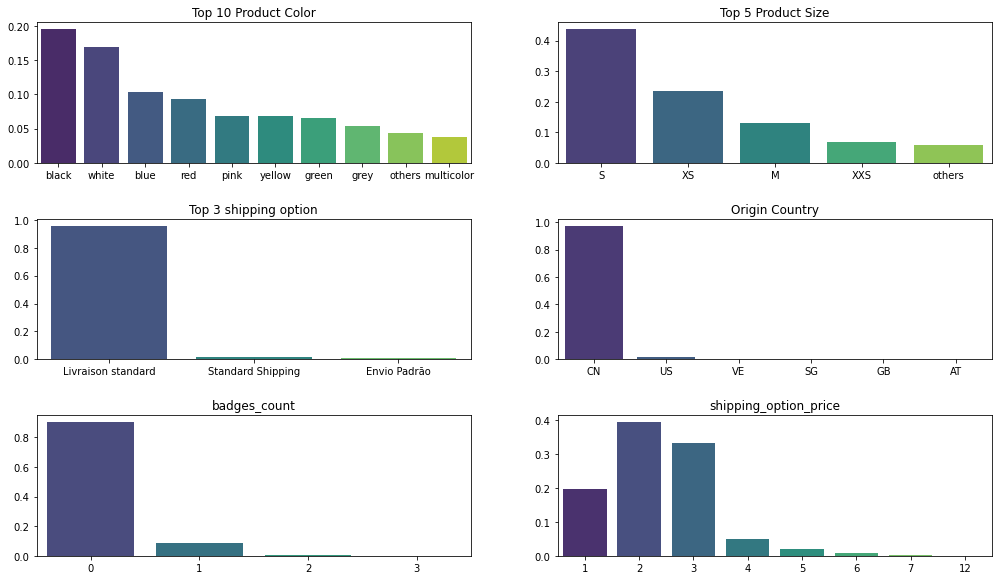

In [17]:
# ordinal values distribution

c = df['color'].value_counts(normalize=True)[:10]
s = df['size'].value_counts(normalize=True)[:5]
n = df['shipping_option_name'].value_counts(normalize=True)[:3]
o = df['origin_country'].value_counts(normalize=True)
b = df['badges_count'].value_counts(normalize=True)
p = df['shipping_option_price'].value_counts(normalize=True)

fig, ax = plt.subplots(3,2,figsize=(14,8))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

sns.barplot(x=c.index,y=c.values,ax=ax[0,0],palette="viridis")
ax[0,0].set_title('Top 10 Product Color')

sns.barplot(x=s.index,y=s.values,ax=ax[0,1],palette="viridis")
ax[0,1].set_title('Top 5 Product Size')

sns.barplot(x=n.index,y=n.values,ax=ax[1,0],palette="viridis")
ax[1,0].set_title('Top 3 shipping option')

sns.barplot(x=o.index,y=o.values,ax=ax[1,1],palette="viridis")
ax[1,1].set_title('Origin Country')

sns.barplot(x=b.index,y=b.values,ax=ax[2,0],palette="viridis")
ax[2,0].set_title('badges_count')

sns.barplot(x=p.index,y=p.values,ax=ax[2,1],palette="viridis")
ax[2,1].set_title('shipping_option_price')


- Most popular product colors are black and white
- Most popular size is S (~ 40%), then XS (~ 25%), then M (~ 15%)
- Shipping option almost all goes to Livraison standard(?!)
- Almost all products made in China
- Over 80% do not have any badge
- Shipping option price mainly between 1-3.

__Numerical__

Text(0.5, 1.0, 'No of unit sold')

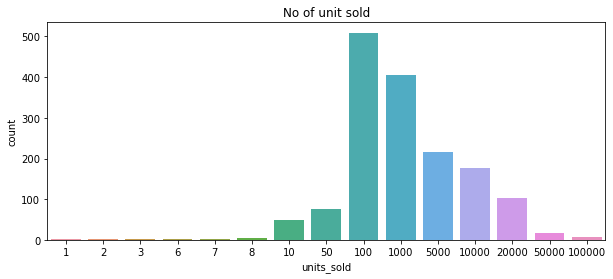

In [18]:
# Target variable

fig = plt.subplots(figsize=(10,4))
#a = df['units_sold'].nunique()
fig = sns.countplot(x='units_sold',data=df)
fig.set_title('No of unit sold')


Mostly no-of-units-sold range around 100~20000. But still there are extreme cases, some products are not selling good (<100) while some are selling extremely good (>50000).

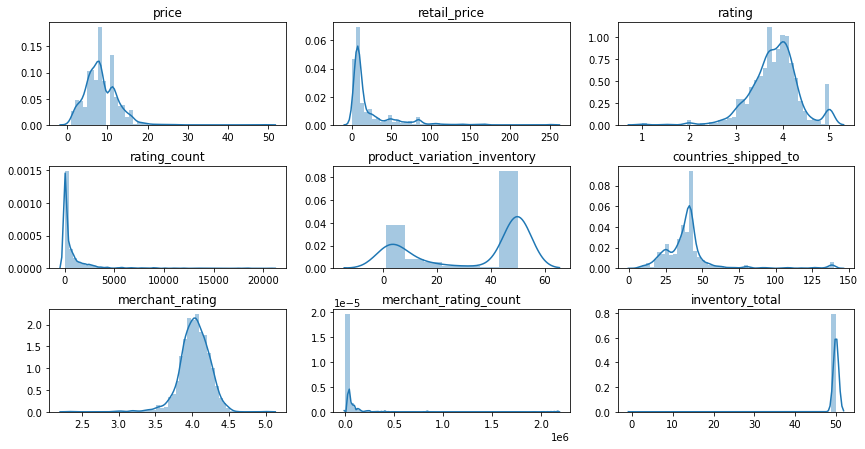

In [19]:
# distribution of values

lst = ['price', 'retail_price','rating', 'rating_count','product_variation_inventory','countries_shipped_to','merchant_rating',
       'merchant_rating_count', 'inventory_total']
#'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count', 


fig, ax = plt.subplots(3,3,figsize=(12,6))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

x_coor = 0
y_coor = 0

for i in range(0,len(lst)):
    if (y_coor %3 ==0) & (y_coor > 0):
        y_coor = 0
        x_coor += 1
        
    #a = df[lst[i]].value_counts(normalize=True)
    #print(lst[i],'\n',a)
    sns.distplot(df[df[lst[i]].notnull()][lst[i]],ax=ax[x_coor,y_coor])
    ax[x_coor,y_coor].set_title(lst[i])
    ax[x_coor,y_coor].set_xlabel('')
    
    y_coor += 1

Seems like inventory_total only has 1 value?!

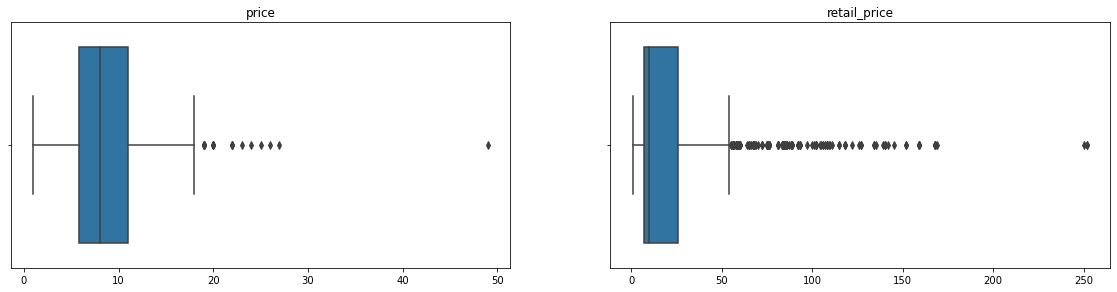

In [20]:
# examine if any outliers (in the meanwhile)

lst = ['price', 'retail_price']

fig, ax = plt.subplots(1,2,figsize=(16,4))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

#x_coor = 0
#y_coor = 0

for i in range(0,len(lst)):
    #if (y_coor %3 ==0) & (y_coor > 0):
     #   y_coor = 0
     #   x_coor += 1
        
    a = df[lst[i]].value_counts(normalize=True)
    
    sns.boxplot(df[lst[i]],ax=ax[i])
    ax[i].set_title(lst[i])
    ax[i].set_xlabel('')
    
   # y_coor += 1

As shown, 'price', 'retail_price' have outliers to handle.

In [21]:
df.inventory_total.value_counts()

50    1563
2        2
1        1
9        1
24       1
30       1
36       1
37       1
38       1
40       1
Name: inventory_total, dtype: int64

Except for few rows, most inventory value is 50. Inventory total will not be considered for modelling.
In real practice, the parameter may not be dropped out if the values do have more variation against each other.

### 2.2 Bivariate Analysis

__Part 1. Inpiration Questions__

### 1. How is the impact of discounted price compared to original retail_price on number of unit sold?

In [22]:
# Create the discount col

df['discount'] = round(1-(df['price']/df['retail_price']),3)
fig = px.scatter(df,x='discount',y='units_sold',title='Discount vs Unit sold')
fig.show()

Looks like no obvious relationship, discount has no strong impact on units_sold.

In [23]:
# Try to group product into different price range, and then observe the relation between discount vs unit sold.

def price_range(price):
    
    if 0<price<=10:
        return '0-10'
    
    if 11<=price<=20:
        return '11-20'

    if 21<price<=30:
        return '21-30'
    
    if price>30:
        return 'above 30'

df['price_range'] = df['price'].apply(price_range)

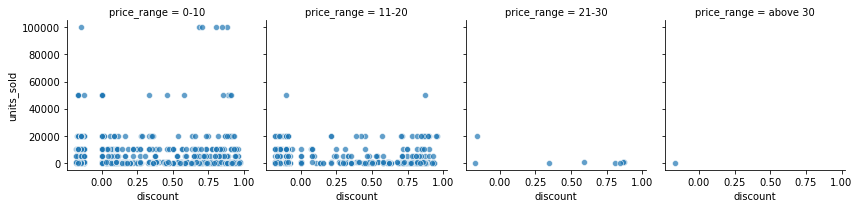

In [24]:
g = sns.FacetGrid(data=df,col='price_range',col_order=['0-10','11-20','21-30','above 30'])
g.map(sns.scatterplot,'discount', 'units_sold',alpha=.7)


Even we breakdown the product into different price range, no obvious relationship shown for discount vs. unit sold.

### 2. What are the top categories of products that sell best?

In [26]:
def category(title):
    
    lst = [x for x in cat2.keyword.unique() if x not in ['Summer','Women','Fashion','Dresses','Casual','Ladies','Tank',
                                                         'Loose','Print','Floral']]
           
    return((',').join(x for x in set(title.split(' ')) if x in lst))
    
df['category'] = df['title_orig'].apply(category) 


Text(0.5, 1.0, 'Top 11 categories of products that sell best')

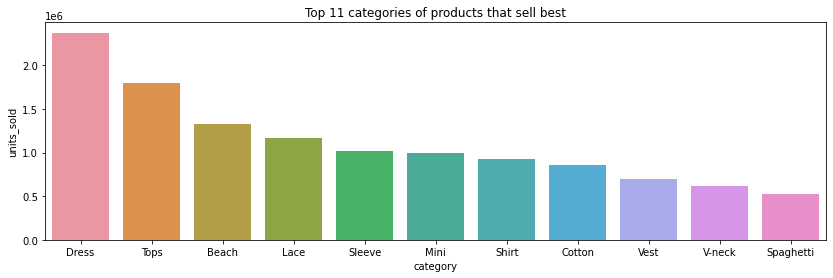

In [27]:
prod_cat = df[['category','units_sold']]
prod_cat = pd.concat([pd.Series(row['units_sold'],row['category'].split(',')) 
                      for _,row in prod_cat.iterrows()]).reset_index()
prod_cat.rename(columns={'index':'category',0:'units_sold'},inplace=True)
top_11 = prod_cat.groupby('category').sum().sort_values(by='units_sold',ascending=False).head(11)

fig = plt.subplots(figsize=(14,4))
fig = sns.barplot(x=top_11.index, y=top_11['units_sold'])
fig.set_title('Top 11 categories of products that sell best')

Dress & Tops are the best selling items. There are many categories which look similar and are attached to the same product.
It's hard to distinguish the product by categories.

### 3. (Do bad products sell ? ) How is the relationship between the quality of a product (ratings) and units sold? Does the price factor affect the ratings? 

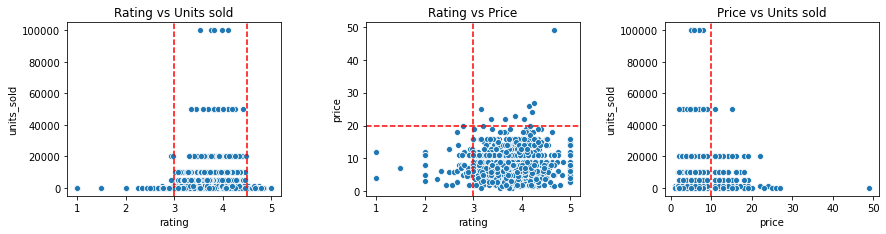

In [28]:
fig, ax=plt.subplots(1,3,figsize=(12,3))
fig.tight_layout()
fig.subplots_adjust(wspace=.4,hspace=.4)

sns.scatterplot(data=df, x='rating', y='units_sold',ax=ax[0])
ax[0].axvline(3, ls='--',color='r')
ax[0].axvline(4.5, ls='--',color='r')
ax[0].set_title('Rating vs Units sold')

sns.scatterplot(data=df, x='rating', y='price',ax=ax[1])
ax[1].axhline(20, ls='--',color='r')
ax[1].axvline(3, ls='--',color='r')
ax[1].set_title('Rating vs Price')

sns.scatterplot(data=df, x='price', y='units_sold',ax=ax[2])
ax[2].axvline(10, ls='--',color='r')
ax[2].set_title('Price vs Units sold')

fig.show()

- Rating does have an impact on units sold. We can see there is not barely units-sold number when rating is lower than 3.Number of units sold increases at rating around 3-4.5 points. 
- Seems rating doesn't have much relationship with price. Price does not increase with rating. But products are getting higher rating (above 3) when product price is higher than 20
- Price range is generally below 20. High number of units sold can be seen when price is lower than 10.

=> Rating has to be above 3 to get higher unit-sold number which mean bad products do not sell. Higher price may not mean higher rating; Lower price has a tendency to get high unit-sold number.

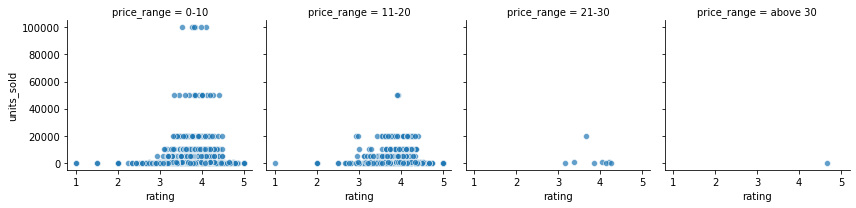

In [29]:
# let's breakdown into diff price range and have a look rating vs unit sold 

g = sns.FacetGrid(data=df,col='price_range',col_order=['0-10','11-20','21-30','above 30'])
g.map(sns.scatterplot,'rating', 'units_sold',alpha=.7)



More obvious result is seen. High unit-sold number occurs when price range falls in 0-10, with rating being concentrated between 3-4.5

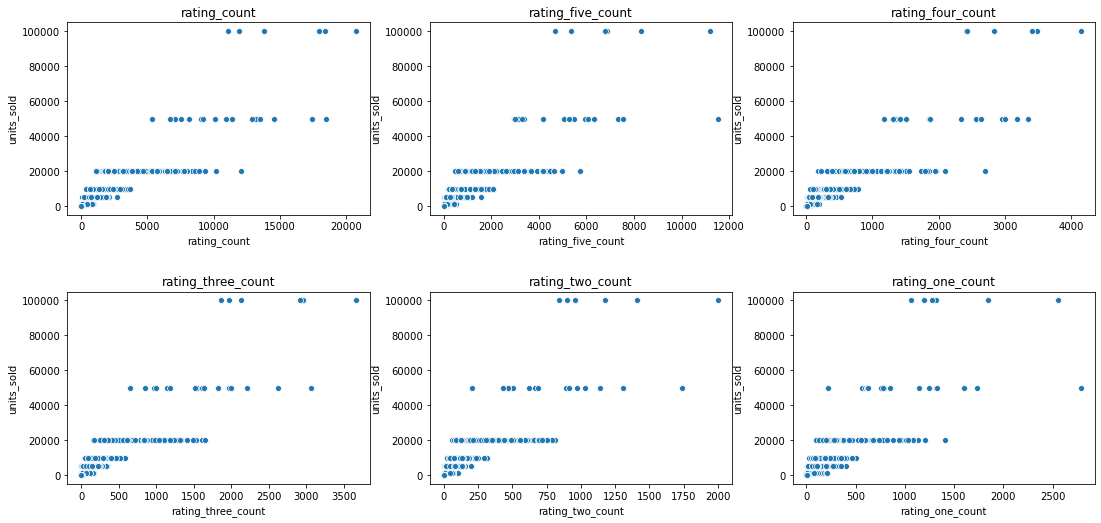

In [30]:
lst = ['rating_count','rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count','rating_one_count']

fig, ax = plt.subplots(2,3,figsize=(15,7))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

x_coor = 0
y_coor = 0

for i in range(0,len(lst)):
    if (y_coor %3 ==0) & (y_coor > 0):
        y_coor = 0
        x_coor += 1
        
    sns.scatterplot(data=df, x=lst[i],y='units_sold',ax=ax[x_coor,y_coor])
    ax[x_coor,y_coor].set_title(lst[i])
    #ax[i].set_xlabel('')
    
    y_coor += 1

Every rating count showed similar pattern, as count increases unit-sold number increases.
It actually make sense, as a product sell better, there are more reviews on the product no more good or bad, thats why raitng count increases with units-sold number...

### 4. Do seller's fame factor into top products? i.e. Any relationship between merchant name and units sold?

Text(0.5, 1.0, 'Top 10 Merchants with high total no. of units sold')

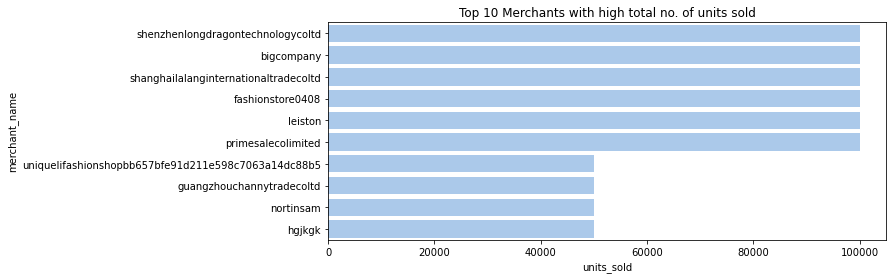

In [31]:
a = df[['merchant_name','units_sold']].sort_values(by='units_sold',ascending=False).head(10)

f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x="units_sold", y="merchant_name", data=a,
            orient="h",color="b")
ax.set_title('Top 10 Merchants with high total no. of units sold')

Some merchants have high number of units sold. But I am not sure if this is because the seller fame or just these merchants dominate the product range? Let's look into the units-sold-per-product number.

Text(0.5, 1.0, 'Top 10 Merchants with high average no. of units sold per product')

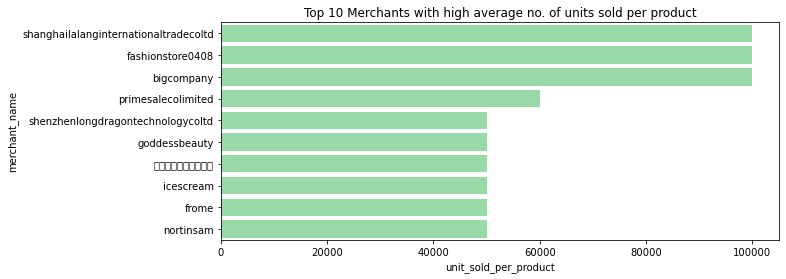

In [32]:
# Calculate for 'unit_sold_per_product'

a = df.groupby('merchant_name').agg({'units_sold':'sum','title':'count'}).reset_index()
a.rename(columns={'title':'count'},inplace=True)
a['unit_sold_per_product'] = a['units_sold']/a['count']

a = a[['merchant_name','unit_sold_per_product']].sort_values(by='unit_sold_per_product',ascending=False).head(10)

f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
sns.barplot(x='unit_sold_per_product', y="merchant_name", data=a,
            orient="h",color='g')
ax.set_title('Top 10 Merchants with high average no. of units sold per product')

Result is a bit different from our first approach, but some merchants do hit high number of unit-sold per product

### 5. Does using ad boost help to sell more?

Text(0.5, 1.0, 'Use_ad_boosts vs units_sold_per_product')

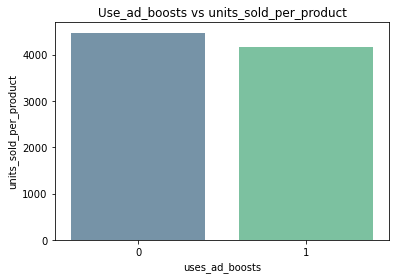

In [33]:
a = df.groupby('uses_ad_boosts')['units_sold'].agg(['sum','count']).reset_index()
a['units_sold_per_product'] = a['sum']/a['count']

g = sns.barplot(data=a,x='uses_ad_boosts',y='units_sold_per_product',palette="viridis",alpha=.7)
g.set_title('Use_ad_boosts vs units_sold_per_product')

Result was not expected. Using ad boost should help to sell more products...otherwise there is no point of doing 
ad boost. Let's dive into different price range and have a look again.

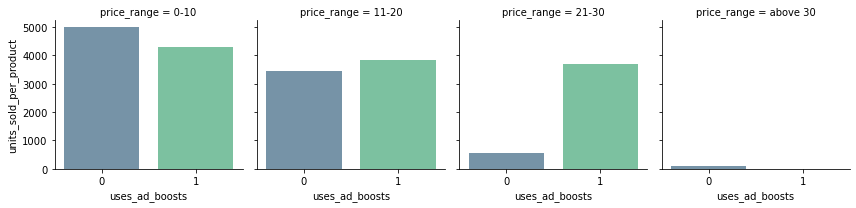

In [34]:
#'Use_ad_boosts vs units_sold_per_product'

a = df.groupby(['uses_ad_boosts','price_range'])['units_sold'].agg(['sum','count']).reset_index()
a['units_sold_per_product'] = a['sum']/a['count']

g = sns.FacetGrid(data=a,col='price_range')
g.map(sns.barplot,'uses_ad_boosts', 'units_sold_per_product',order=[0,1],palette="viridis",alpha=.7)


Looks like ad boosting works when the product price is higher, especially for those above 20 dollars.


### 6. Do the number of tags (making a product more discoverable) factor into the success of a product ?

In [35]:
def tag_count(tag):
    
    return len(tag.split(','))

df['tag_count'] = df['tags'].apply(tag_count)

Text(0.5, 1.0, 'No of tags vs. units sold')

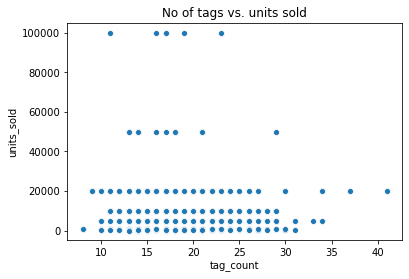

In [36]:
g = sns.scatterplot(data=df,x='tag_count',y='units_sold')
g.set_title('No of tags vs. units sold')

Looks like no of tags does not have obvious relationship with number of units sold, i.e. no of tags does not factor into the success of a product.

#### Part 2. Let's have a look into other factors

__Categorical Independent Variable vs Target Variable ('units_sold_per_product')__

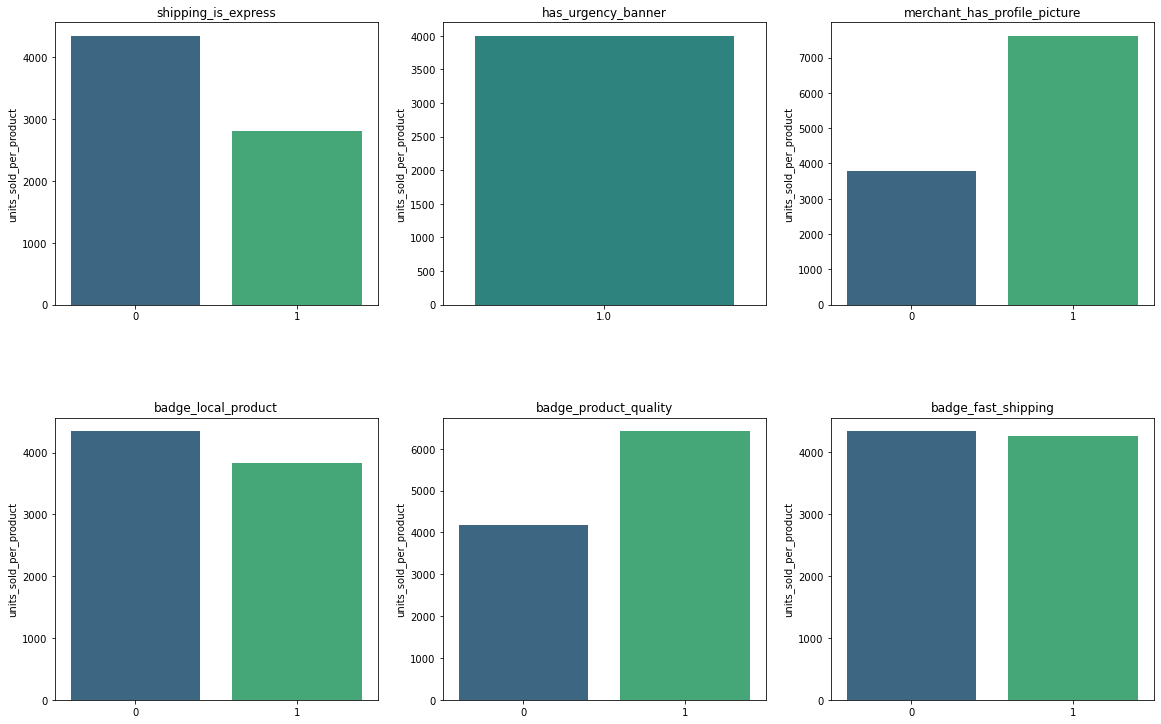

In [37]:
# Categorical Independent Variable vs Target Variable

lst = ['shipping_is_express','has_urgency_banner',
'merchant_has_profile_picture','badge_local_product', 'badge_product_quality', 
'badge_fast_shipping']

fig, ax = plt.subplots(2,3,figsize=(16,10))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

x_coor = 0
y_coor = 0

for i in range(0,len(lst)):
    if (y_coor %3 ==0) & (y_coor > 0):
        y_coor = 0
        x_coor += 1
    
    #a = df.groupby(lst[i])['units_sold'].agg({'units_sold':'sum','title':'count'}).reset_index()
    #a = round(a.div(a.sum(0)),2).reset_index()
    
    a = df.groupby(lst[i])['units_sold'].agg(['sum','count']).reset_index()
    a['units_sold_per_product'] = a['sum']/a['count']

    sns.barplot(data=a,x=lst[i],y='units_sold_per_product',ax=ax[x_coor,y_coor],palette="viridis")
    
    ax[x_coor,y_coor].set_title(lst[i])
    ax[x_coor,y_coor].set_xlabel('')
    
    y_coor += 1

Pattern seen:
- merchant has profile pic/badge to assure product quality resulted in higher average units sold number 
- shipping-is-express doesnt show higher average units sold.

No conclusion:
- For urgency banner, from the graph we can't see differentiation (most marked NA in urgency banner column)
- badge on local product / fast shipping - not obvious difference could be spotted out.

__Ordinal Independent Variable vs Target Variable ('units_sold_per_product')__

In [38]:
a = df.groupby('product_color')['units_sold'].agg(['sum','count']).reset_index()
a['units_sold_per_product'] = a['sum']/a['count']
a = a.sort_values(by='units_sold_per_product',ascending=False)[:5]

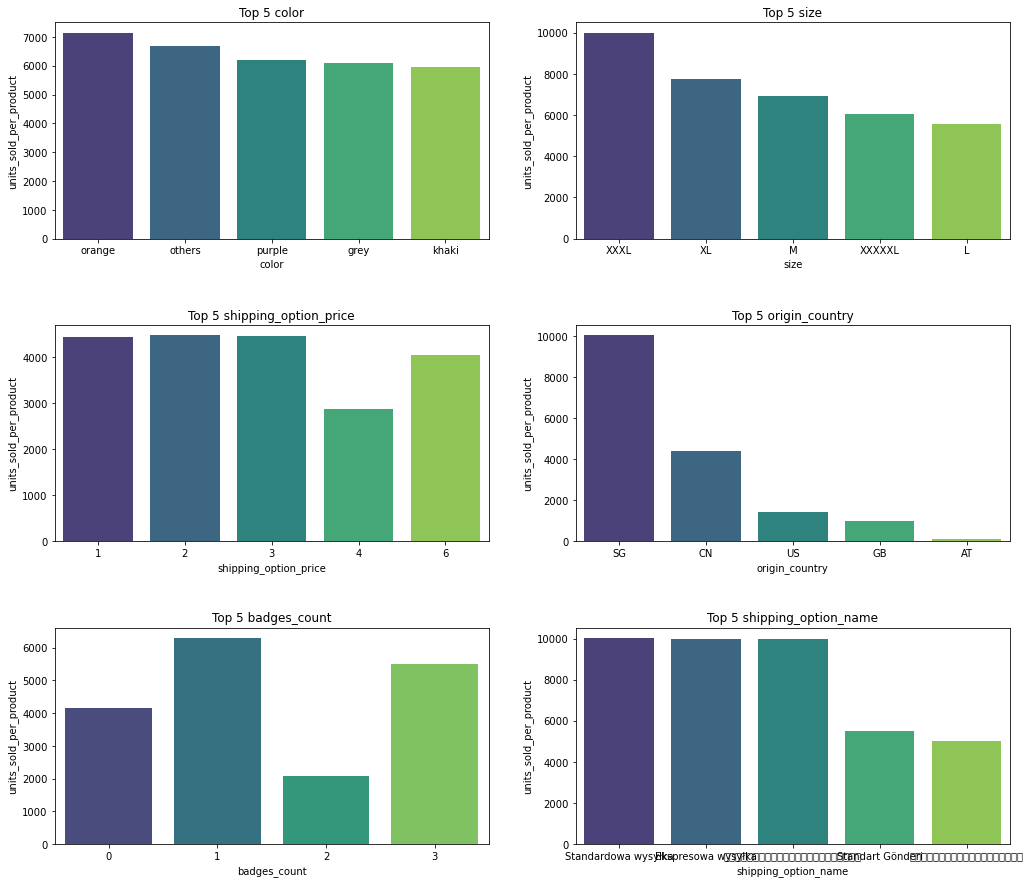

In [39]:

lst = ['color','size',
'shipping_option_price','origin_country','badges_count','shipping_option_name']

fig, ax = plt.subplots(3,2,figsize=(14,12))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

x_coor = 0
y_coor = 0

for i in range(0,len(lst)):
    if (y_coor %2 ==0) & (y_coor > 0):
        y_coor = 0
        x_coor += 1
    
    #a = df.groupby(lst[i])['units_sold'].agg({'units_sold':'sum','title':'count'}).reset_index()
    #a = round(a.div(a.sum(0)),2).reset_index()
    
    # Extract the top 5 result
    a = df.groupby(lst[i])['units_sold'].agg(['sum','count']).reset_index()
    a['units_sold_per_product'] = a['sum']/a['count']
    a = a.sort_values(by='units_sold_per_product',ascending=False)[:5]
    
    sns.barplot(data=a,x=a[lst[i]],y=a['units_sold_per_product'],ax=ax[x_coor,y_coor],palette="viridis")
    
    ax[x_coor,y_coor].set_title('Top 5 '+ lst[i])
    #ax[x_coor,y_coor].set_xlabel('')
    
    y_coor += 1


Pattern spotted:
- Orange color sells the best.
- XXXL,XL sells better.
- Singapore-made products sell the best
- Some specific shipping options do sell better

No conclusion:
- shipping option price
- badge count

__Numerical Independent Variable vs Target Variable 'units_sold_per_product'__

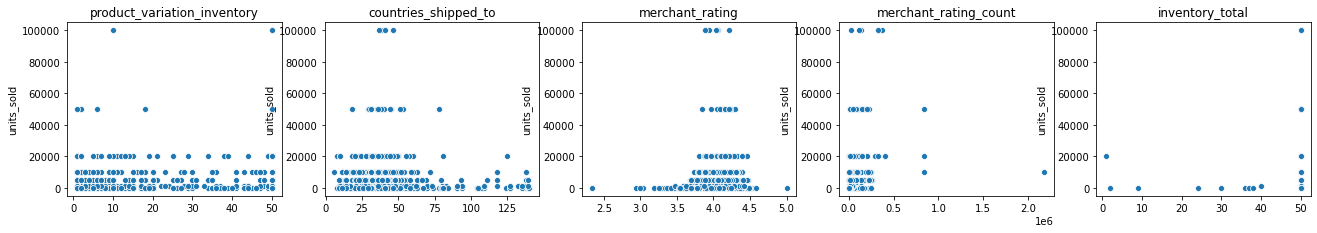

In [40]:
lst = ['product_variation_inventory','countries_shipped_to','merchant_rating', 'merchant_rating_count','inventory_total']

fig, ax = plt.subplots(1,5,figsize=(18,3))
fig.tight_layout()
fig.subplots_adjust(wspace=.2,hspace=.4)

#x_coor = 0
#y_coor = 0

for i in range(0,len(lst)):
 #   if (y_coor %3 ==0) & (y_coor > 0):
  #      y_coor = 0
    #    x_coor += 1
        
    sns.scatterplot(data=df, x=lst[i],y='units_sold',ax=ax[i])
    ax[i].set_title(lst[i])
    ax[i].set_xlabel('')
    
 #   y_coor += 1

- Merchant rating range around 3.8~4.5, high no of units sold only results when merchant rating is above 3.8.

__Correlation Map__

In [41]:
df_corr = df.drop(['has_urgency_banner','theme'],axis=1)
df_corr = df_corr.corr()
px.imshow(df_corr,height=700,color_continuous_scale=px.colors.sequential.GnBu)

- Most related to unit sold: rating count & invidividual rating count(1,2,3,4,5)
- However, rating count & indidividual rating counts(1,2,3,4,5) are highly correlated, total rating count seems to be extra as individual rating count(1,2,3,4,5) variables sum up to the total one. 
- Most correlated for other variables: price and shipping_option_price, retai_price and discount, badge count and each individual badge, shipping is express and badge fast shipping

__Action points after EDA:__

Numerical:
- Remove total rating count but keep the individual rating count (1,2,3,4,5)
- Remove discount
- Remove inventory_total
- Remove tag_count

### 3. Duplicated rows, Missing values, Outlier handling

__Drop the duplicated rows__

In [42]:
df_prod = df.drop_duplicates().reset_index(drop=True)

In [43]:
print(df.shape)
print(df_prod.shape)

(1573, 49)
(1539, 49)


__Drop the irrelevant variables__

In [44]:
df_prod.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'size', 'color', 'discount',
       'price_range', 'category', 'tag_count'],
  

In [45]:
# Variables that contain only 1 single value, having no differentiation and not helping on prediction of target variable.

print('\n',df_prod.currency_buyer.value_counts())
print('\n',df_prod.theme.value_counts())
print('\n',df_prod.crawl_month.value_counts())


 EUR    1539
Name: currency_buyer, dtype: int64

 summer    1539
Name: theme, dtype: int64

 2020-08    1539
Name: crawl_month, dtype: int64


In [46]:
df_prod = df_prod.drop(['currency_buyer','theme','crawl_month'],axis=1)

In [47]:
# Check the unique values carried by categorical variables
# remove those with many unique values (>100)

print('Total no of rows: ', df_prod.shape[0])
lst = {}
for x in df_prod.select_dtypes(exclude=np.number).columns:
    lst[x] = [df_prod[x].nunique()]

unique_table = pd.DataFrame(lst).T
unique_table = unique_table.rename(columns={0:'no_of_unique_values'})
print(unique_table.sort_values(by='no_of_unique_values',ascending=False))
print('\nvariables to be removed: ', unique_table[unique_table['no_of_unique_values']>100].index.tolist())


Total no of rows:  1539
                           no_of_unique_values
product_id                                1341
product_picture                           1341
product_url                               1341
tags                                      1230
title_orig                                1203
title                                     1201
merchant_info_subtitle                    1058
merchant_title                             958
merchant_id                                958
merchant_name                              957
category                                   831
merchant_profile_picture                   125
product_variation_size_id                  106
product_color                              101
color                                       17
shipping_option_name                        15
size                                        11
origin_country                               6
price_range                                  4
urgency_text                        

In [48]:
df_prod = df_prod.drop(['title', 'title_orig', 'tags', 'product_color', 'product_variation_size_id', 'merchant_title',
                        'merchant_name', 'merchant_info_subtitle', 'merchant_id', 
                        'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'category'],axis=1)


In [49]:
# Remove'rating_count' which has high correlation with individual rating count variables
# Remove 'discount' which has high correlation with price & retail price
# Remove'price_range' 
# Remove 'inventory_total' which has almost no variation in values
# Remove tag_count which has not much impact on the units sold
# Remove badge count which is highly correlated to individual badge count

df_prod = df_prod.drop(['rating_count','discount','price_range','inventory_total','tag_count','badges_count',
                       ],axis=1)


In [50]:
print(df_prod.shape,'\n')
df_prod.columns
#print(df_prod.dtypes)

(1539, 26) 



Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'size', 'color'],
      dtype='object')

__Missing values handling__

In [51]:
# check null values

na = df_prod.isnull().sum()
round(na[na>0]/df.shape[0],3)

rating_five_count     0.027
rating_four_count     0.027
rating_three_count    0.027
rating_two_count      0.027
rating_one_count      0.027
has_urgency_banner    0.681
urgency_text          0.681
origin_country        0.010
dtype: float64

In [52]:
# check if the total rating count of those null values is 0. If yes, that means the individual rating count could also be 0.

print(df[df['rating_five_count'].isnull()]['rating_count'].sum())
print(df[df['rating_four_count'].isnull()]['rating_count'].sum())
print(df[df['rating_three_count'].isnull()]['rating_count'].sum())
print(df[df['rating_two_count'].isnull()]['rating_count'].sum())
print(df[df['rating_one_count'].isnull()]['rating_count'].sum())

0
0
0
0
0


In [53]:
# fill the individual rating count to be 0

na = ['rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count']

for i in na:
    df_prod[i].fillna(0,inplace=True)

In [54]:
# check null values again

na = df_prod.isnull().sum()
round(na[na>0]/df.shape[0],3)

has_urgency_banner    0.681
urgency_text          0.681
origin_country        0.010
dtype: float64

In [55]:
# fill the na value of 'has_urgency_banner' to be 0
print(df_prod.has_urgency_banner.value_counts(dropna=False))
df_prod.has_urgency_banner.fillna(0,inplace=True)

NaN    1071
1.0     468
Name: has_urgency_banner, dtype: int64


In [56]:
# drop the variables which have too many missing values...

df_prod.drop('urgency_text',axis=1,inplace=True)

In [57]:
# drop na values of 'origin_country'

df_prod.dropna(subset=['origin_country'],axis=0,inplace=True)


In [58]:
na = df_prod.isnull().sum()
round(na[na>0]/df.shape[0],3)

Series([], dtype: float64)

In [59]:
df_prod.shape

(1523, 25)

__Outlier handling__

<AxesSubplot:>

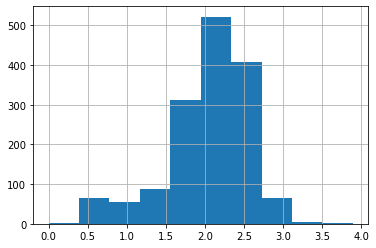

In [60]:
# perform log transformation to minimize the effect of extreme large values

df_prod['price_log'] = np.log(df_prod['price'])
df_prod['price_log'].hist()

The distribution looks much closer to normal and the effect of extreme values has been significantly subsided.

<AxesSubplot:>

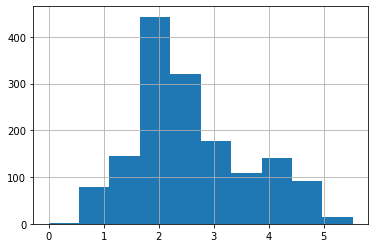

In [61]:
df_prod['retail_price_log'] = np.log(df_prod['retail_price'])
df_prod['retail_price_log'].hist()

In [62]:
df_prod = df_prod.drop(['price','retail_price'],axis=1)
df_prod.shape

(1523, 25)

### 4. Model building and Evaluation

Models selected: Linear Regression, Lasso, Random Forest, XGBoost

Cross Validation method: K-Fold Cross Validation

Evaluation metric: R-Squared Score


In [82]:
from sklearn.linear_model import LinearRegression,Lasso
#from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score

__Make dummy variables for the categorical variable__

In [64]:
df_prod = pd.get_dummies(df_prod)

In [65]:
df_prod.shape

(1523, 70)

In [66]:
# Final list for modelling

df_prod.columns

Index(['units_sold', 'uses_ad_boosts', 'rating', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating',
       'merchant_has_profile_picture', 'price_log', 'retail_price_log',
       'shipping_option_name_Ekspresowa wysyłka',
       'shipping_option_name_Envio Padrão',
       'shipping_option_name_Envío normal',
       'shipping_option_name_Expediere Standard',
       'shipping_option_name_Livraison Express',
       'shipping_option_name_Livraison standard',
       'shipping_option_name_Spedizione standard',
       'shipping_option_name_Standard Shipping',
       'shipping_option_name_Standardowa wysyłka',
       'shipping_option_name_Standardversand',
       'shippin

__Prepare the data for modelling__

In [67]:
X = df_prod.drop('units_sold',axis=1)
y = df_prod['units_sold']
print(X.shape)
print(y.shape)

(1523, 69)
(1523,)


__A. Linear Regression__

In [68]:
# Use K-Fold Cross Validation to check how robust our model is to unseen data.

i = 1
r2_score_linear = []

kf = KFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    pred_linear = model.predict(X_test)
    
    r2_score_linear.append(r2_score(y_test,pred_linear))
    
    i+=1

print('R-Squared score :',r2_score_linear)

r2_score_linear_mean = np.mean(r2_score_linear)
print('\nAverage K-Fold Score : ',r2_score_linear_mean)

R-Squared score : [0.8596577270608549, 0.6709482811178161, 0.7844935443228126, 0.7781270001924928, 0.7682291397387678]

Average K-Fold Score :  0.7722911384865488


__B. Lasso Regression__

In [69]:
i = 1
r2_score_lasso = []

kf = KFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = Lasso()
    model.fit(X_train,y_train)
    pred_lasso = model.predict(X_test)
    
    r2_score_lasso.append(r2_score(y_test,pred_lasso))
    
    i+=1

print('R-Squared score :',r2_score_lasso)

r2_score_lasso_mean = np.mean(r2_score_lasso)
print('\nAverage K-Fold Score : ',r2_score_lasso_mean)

R-Squared score : [0.8601485900042425, 0.6719460965869026, 0.7841671906344764, 0.7799305472128849, 0.7688438840411411]

Average K-Fold Score :  0.7730072616959295


__C. Random Forest__

Tree based bootstrapping algorithm where a certain no of weak learners(decision trees) are combinded to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a fx. of all the predictions made by the individual learners.
In case of regression problems, the final prediction can be mean of all the predictions.

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters.Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the max depth of tree and n_estimators decides the no of trees that will be used in random forest model.

In [70]:
paramgrid = {'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,500,50))}
grid_search = GridSearchCV(RandomForestRegressor(random_state=1),paramgrid)
# Fit the grid search model
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=51,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [72]:
i = 1
r2_score_rf = []

kf = KFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = RandomForestRegressor(max_depth=15,n_estimators=51,random_state=1)
    model.fit(X_train,y_train)
    pred_rf = model.predict(X_test)
    
    r2_score_rf.append(r2_score(y_test,pred_rf))
    
    i+=1

print('R-Squared score :',r2_score_rf)

r2_score_rf_mean = np.mean(r2_score_rf)
print('\nAverage K-Fold Score : ',r2_score_rf_mean)

R-Squared score : [0.8511585072916718, 0.7458061202850313, 0.7957707027117065, 0.762688155600137, 0.7171619041595558]

Average K-Fold Score :  0.7745170780096204


__Feature Importance__

To find which features are most important to this problem

<AxesSubplot:>

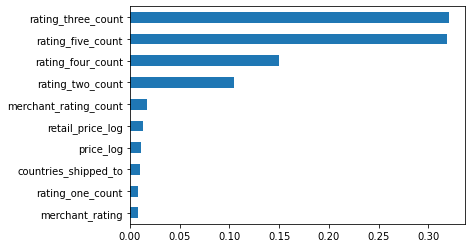

In [73]:
importance = pd.Series(model.feature_importances_,index=X.columns)
importance = importance.sort_values(ascending=False)[:10]

importance[::-1].plot(kind='barh')

__D. XGBoost__

XGBoost is a fast and efficient algorithm. It is a boosting algorithm. 
XGBoost works only with numeric varibles and we have already replaced the categorical variables with numeric variables. 
Let's have a look at the parameters that we are going to use in our model.

- n_estimator: this specifies the no of trees for the model
- max_depth: we can specify max depth of a tree using this parameter.

(will apply the same setting as random forest)

In [79]:
i = 1
r2_score_xgb = []

kf = KFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):

    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = XGBRegressor(max_depth=15,n_estimators=51,random_state=1)
    model.fit(X_train,y_train)
    pred_xgb = model.predict(X_test)
    
    r2_score_xgb.append(r2_score(y_test,pred_xgb))
    
    i+=1

print('R-Squared score :',r2_score_xgb)

r2_score_xgb_mean = np.mean(r2_score_xgb)
print('\nAverage K-Fold Score : ',r2_score_xgb_mean)

[08:48:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:48:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Squared score : [0.8057427535000029, 0.7575152709111861, 0.7827339726198433, 0.7360083106663495, 0.7403122907202984]

Average K-Fold Score :  0.764462519683536


__Compare the R-Squared scores of different models__

the higher the score, the better the model

In [80]:
model = ['Linear Regression','Lasso Regression','Random Forest','XGBoost']
r2_score = [r2_score_linear_mean,r2_score_lasso_mean,r2_score_rf_mean,r2_score_xgb_mean]
pd.DataFrame({'Model':model,'R-Squared Score':r2_score})

Model  R-Squared Score
0  Linear Regression         0.772291
1   Lasso Regression         0.773007
2      Random Forest         0.774517
3            XGBoost         0.764463

__Conclusion__

From the performance as above, Random Forest model performs the best with highest R-Squared Score and is recommended to forecast units sold for each product.

In [83]:
# Example

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = RandomForestRegressor(max_depth=15,n_estimators=51,random_state=1)
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)

pd.DataFrame({'actual':y_test,'pred':pred_rf.astype(int)}).reset_index(drop=True)[:10]


actual   pred
0   10000   6102
1    1000   1000
2   20000   7374
3   10000  11372
4     100     99
5     100     95
6    1000    672
7     100     86
8   50000  34117
9    1000   1787